In [1]:
import pandas as pd
import numpy as np

## Load data from csv file

In [2]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""



"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [3]:
print ('df is an object of ', type(df))
print ('\n')
print(df.head(5))
print(df.shape)

df is an object of  <class 'pandas.core.frame.DataFrame'>


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


### Store values in the pandas dataframe as numpy arrays
- we want to use the average number of rooms to predict the housing price
- we need to extract the data from df and convert them to numpy arrays

In [4]:
y = df['PRICE'].values
x = df['RM'].values

crime = df['CRIM'].values
print ('both x and y are now objects of', type(x))

print(crime.shape)

both x and y are now objects of <class 'numpy.ndarray'>
(506,)


### Plot the housing price against the average number of rooms

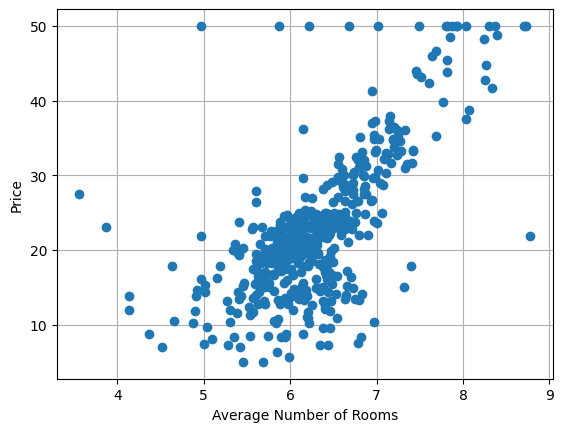

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

# Guess a line to fit the data

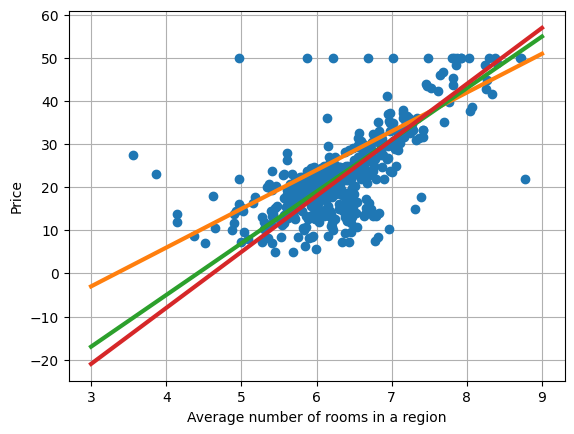

In [6]:
w1 = 9
w0 = -30
xplt = np.linspace(3,9,100)
yplt = w1 * xplt + w0
plt.plot(x,y,'o')    # Plot the data points

yplt1 = 12*xplt -53
yplt2 = xplt*13 -60

plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the line
plt.plot(xplt,yplt1,'-',linewidth=3)  # Plot the line
plt.plot(xplt,yplt2,'-',linewidth=3)  # Plot the line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()


## Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE) to determine goodness of fit

### Reminder :

Given :
- a dataset : $(x_i, y_i)$, $i = 1, 2, 3, ..., N$
- a model : $\hat{y} = w_1x + w_0$

We can compute the following two error functions :
- Mean Squared Error: $\displaystyle MSE = \frac{1}{N}\sum_{i=1}^N || y_i - \hat{y_i}||^2$
- Mean Absolute Error: $\displaystyle MAE = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y_i}|$

In [23]:
## To-do
## Calculate MSE and MAE

y_hat=13*x -60 # Remember to compute on actual samples and not linspace
#Linspace has a set of points representing range of values in x (used to plot).
# But it isn't actual datapoints. We use x to access actual points as that's our training data
mse= np.mean((y-y_hat)**2) #summation divided by N is mean/average
mae = np.mean(np.abs(y-y_hat)) #Take absolute values inside mean. Or else positives and negatives will be added in mean and can canel out.


y_hat2= 12*x -53
mse2= np.mean((y-y_hat2)**2)
mae2 = np.mean(np.abs(y-y_hat2))

print("MSE 1: ",mse, "MAE 1: ",mae)
print("MSE 2: ",mse2, "MAE 2: ",mae2)



MSE 1:  51.779498306324115 MAE 1:  4.871650197628459
MSE 2:  47.75182839525692 MAE 2:  4.5944110671936755


In [26]:
## To-do
ones_v = np.ones((x.shape[0],1)) #x.shape[0] gets number of rows/samples in your data
X= np.hstack([ones_v,x.reshape(-1,1)]) # Makes sure that first dimension gets filled with appropriate value

w=np.linalg.inv(X.T@X)@X.T@y # Pythonic code can allow you to all steps in one line

y_hat_ml=X@w

mse_ml=np.mean((y-y_hat_ml)**2)
mae_ml=np.mean(np.abs(y-y_hat_ml))

print("MSE of: ",mse_ml)
print("MAE of: ",mae_ml)

MSE of:  43.60055177116956
MAE of:  4.447772901532243
